In [3]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
grid = np.array([
    [0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,1,1,1,0,0],
    [0,0,1,1,0,0,0,0,1,0,0],
    [0,0,1,1,0,0,0,0,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0],
    [0,0,1,1,1,1,1,1,1,0,0],
    [0,0,0,0,0,0,0,0,0,0,0],])

In [5]:
# start and goal points 
start = (0,2)
goal = (5,10)

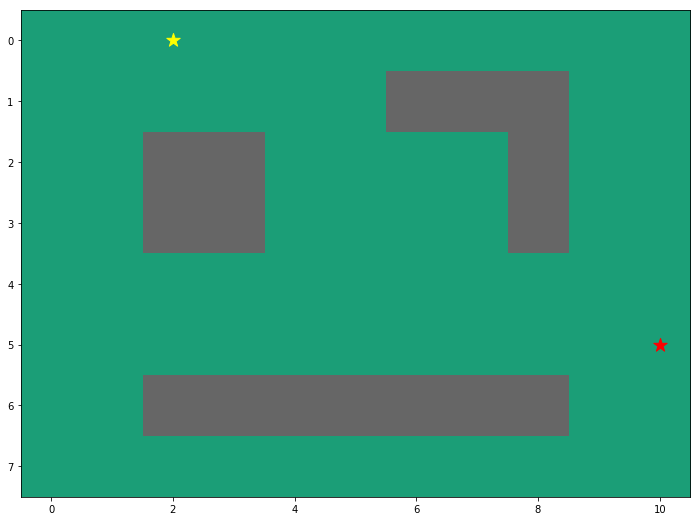

In [6]:
# plot map and path
fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(start[1],start[0], marker = "*", color = "yellow", s = 200)
ax.scatter(goal[1],goal[0], marker = "*", color = "red", s = 200)
plt.show()

In [7]:
def heuristic(a, b):
    x1,y1=a
    x2,y2=b
    return abs(x1-x2)+abs(y1-y2)

 

In [8]:
def astar(array, start, goal):

    neighbors = [(0,1),(0,-1),(1,0),(-1,0)]

    close_set = set()
    came_from = {}
    gscore = {start:0}
    fscore = {start:heuristic(start, goal)}
    oheap = []

    heapq.heappush(oheap, (fscore[start], start))
    
    while oheap:
        current = heapq.heappop(oheap)[1]
        if current == goal:
            data = []
            while current in came_from:
                data.append(current)
                current = came_from[current]
            return data

        close_set.add(current)
        for i, j in neighbors:
            neighbor = current[0] + i, current[1] + j            
            tentative_g_score = gscore[current] + heuristic(current, neighbor)
            if 0 <= neighbor[0] < array.shape[0]:
                if 0 <= neighbor[1] < array.shape[1]:                
                    if array[neighbor[0]][neighbor[1]] == 1:
                        continue
                else:
                    # array bound y walls
                    continue
            else:
                # array bound x walls
                continue
                
            if neighbor in close_set and tentative_g_score >= gscore.get(neighbor, 0):
                continue
                
            if  tentative_g_score < gscore.get(neighbor, 0) or neighbor not in [i[1]for i in oheap]:
                came_from[neighbor] = current
                gscore[neighbor] = tentative_g_score
                fscore[neighbor] = tentative_g_score + heuristic(neighbor, goal)
                heapq.heappush(oheap, (fscore[neighbor], neighbor)) 

             

In [9]:
route = astar(grid, start, goal)
route = route + [start]
route = route[::-1]
print(route)

[(0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (1, 10), (2, 10), (3, 10), (4, 10), (5, 10)]


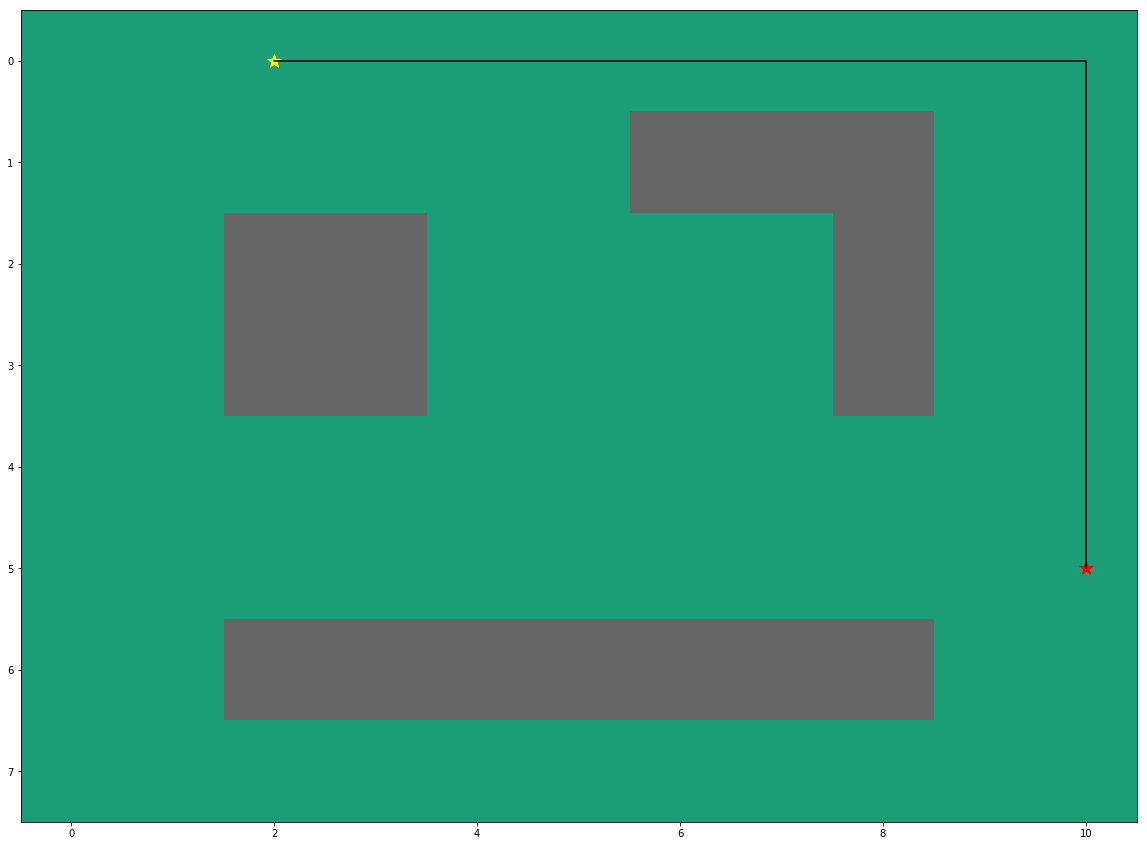

In [10]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#extract x and y coordinates from route list
x_coords = []
y_coords = []

for i in (range(0,len(route))):
    x = route[i][0]
    y = route[i][1]
    x_coords.append(x)
    y_coords.append(y)

# plot map and path
fig, ax = plt.subplots(figsize=(20,20))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(start[1],start[0], marker = "*", color = "yellow", s = 200)
ax.scatter(goal[1],goal[0], marker = "*", color = "red", s = 200)
ax.plot(y_coords,x_coords, color = "black")
plt.show()